[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Label mapping: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,500,000 (5.72 MB)

 Trainable params: 1,500,000 (5.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.4533 - loss: 1.6985 - val_accuracy: 0.6528 - val_loss: 0.9706
Epoch 2/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6696 - loss: 0.7575 - val_accuracy: 0.7133 - val_loss: 0.7368
Epoch 3/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7517 - loss: 0.6070 - val_accuracy: 0.7419 - val_loss: 0.6315
Epoch 4/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7927 - loss: 0.5265 - val_accuracy: 0.7638 - val_loss: 0.6102
Epoch 5/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8410 - loss: 0.4276 - val_accuracy: 0.7730 - val_loss: 0.6257
Epoch 6/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8742 - loss: 0.3395 - val_accuracy: 0.7668 - val_loss: 0.6494
Epoch 7/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8944 - loss: 0.2885 - val_accuracy: 0.7768 - val_loss: 0.7536
Epoch 8/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9223 - loss: 0.2210 - val_accuracy: 

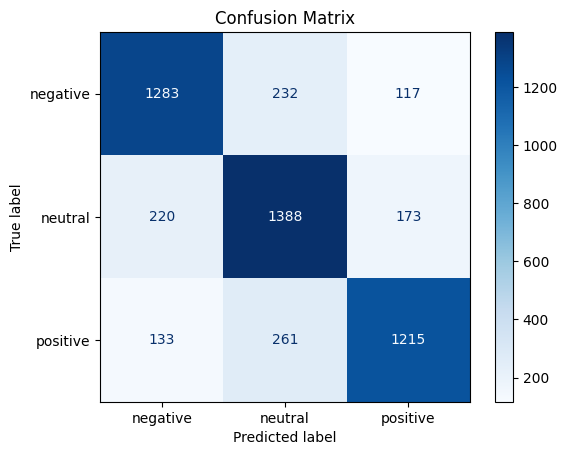


Type a message (or type 'exit'): exit


In [1]:
# Install & Import
!pip install -q openpyxl
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Conv1D, GlobalMaxPooling1D,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt


# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/CHAT_BASED_SENTIMENT_ANALYSIS_USING_CNN/DATASET.csv")
df.columns = df.columns.str.strip().str.upper()

#  Clean labels
def clean_label(label):
    label = str(label).strip().lower()
    if 'pos' in label:
        return 'positive'
    elif 'neg' in label:
        return 'negative'
    elif 'neu' in label:
        return 'neutral'
    else:
        return 'unknown'

df['REACTION'] = df['REACTION'].apply(clean_label)
df = df[df['REACTION'] != 'unknown'].reset_index(drop=True)


# Clean text
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['CLEAN_TEXT'] = df['TEXT'].astype(str).apply(clean_text)


# Encode labels
le = LabelEncoder()
df['LABEL'] = le.fit_transform(df['REACTION'])
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


# Tokenize
max_words = 15000
max_len = 150
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['CLEAN_TEXT'])
sequences = tokenizer.texts_to_sequences(df['CLEAN_TEXT'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post')


# Load GloVe embeddings
!wget -q http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q -o glove.6B.zip

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        vec = embedding_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec


# Split dataset
X = padded
y = df['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# Handle class imbalance
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(cw))


# Build CNN Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_len, trainable=True),
    Conv1D(256, kernel_size=5, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()


# Train Model
early_stop = EarlyStopping(patience=6, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f}")

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


# Predict custom input
def predict_sentiment(user_input):
    cleaned = clean_text(user_input)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded_input = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(padded_input)
    class_idx = np.argmax(pred)
    return le.inverse_transform([class_idx])[0]

# Example interactive loop
while True:
    user_input = input("\nType a message (or type 'exit'): ")
    if user_input.lower() == 'exit':
        break
    sentiment = predict_sentiment(user_input)
    print("Predicted Sentiment:", sentiment)
